In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pickle

import sys
import os

project_path = os.path.expanduser('~/repos/metric_graph/')
sys.path.append(project_path)

from construct_graph.graph import Graph, Flat
import construct_graph
from calculations.helper_functions import check_convergence

%load_ext autoreload
%autoreload 2

#### Graph sizes to sample:

In [81]:
nums_Vs = (10**np.linspace(3, 6, 16)).astype(int)[:11]
print(f"num_Vs = {nums_Vs}")

num_Vs = [  1000   1584   2511   3981   6309  10000  15848  25118  39810  63095
 100000]


In [101]:
nums_Vs = (10**np.linspace(3, 6, 16)).astype(int)
print(f"num_Vs = {nums_Vs}")

num_Vs = [   1000    1584    2511    3981    6309   10000   15848   25118   39810
   63095  100000  158489  251188  398107  630957 1000000]


### Get coefficients

#### By importing

In [108]:
# file = open("../data/delaunay/coefficients/delaunay_coefficients_cg.pkl", "wb")
# pickle.dump(coefficients, file)
# file.close()

# file = open("../data/delaunay/coefficients/delaunay_coefficients_cg.pkl", "rb")
# coefficients = pickle.load(file)
# file.close()

#### By calculation

In [104]:
seed = 0
num_Vs = 1_000_000

np.random.seed(seed)
rd = construct_graph.patch_graph.Random_Delaunay(num_Vs)
g = construct_graph.patch_graph.Patch(rd)
print(f"\nSEED = {seed}, num_Vs = {g.num_Vs}\n")
eq = construct_graph.patch_graph.Cell_Problem(g)
xi = eq.solve_corrector_equation()
c = eq.construct_homogenized_tensor(xi)
print(c)


SEED = 0, num_Vs = 1000000

Residual too large = 3.3943472944369546e-08
0.9201245197443716


In [110]:
len(g.edges)

3000003

In [109]:
# file = open("../data/delaunay/graphs/delaunay_torus_1M_vertices_seed_0.pkl", "wb")
# pickle.dump(g, file)
# file.close()

In [82]:
# coefficients = {}

for en, num_Vs in enumerate(nums_Vs[-1:]):

    en += len(nums_Vs) - 1

    print(f"\n\ngraph size = {en + 1} / {len(nums_Vs)}\n\n\n")

    coefficients[num_Vs] = []
    check = False
    seed = -1

    if en == 0:
        previous_mean = None
    else:
        previous_mean = np.mean(coefficients[nums_Vs[en - 1]])

    while not check:
        seed += 1
        np.random.seed(seed)
        rd = construct_graph.patch_graph.Random_Delaunay(num_Vs)
        g = construct_graph.patch_graph.Patch(rd)
        print(f"\nSEED = {seed}, num_Vs = {g.num_Vs}\n")
        eq = construct_graph.patch_graph.Cell_Problem(g)
        xi = eq.solve_corrector_equation()

        coefficients[num_Vs].append(eq.construct_homogenized_tensor(xi))

        check = check_convergence(coefficients[num_Vs], mean_previous_graph_size=previous_mean)



graph size = 11 / 11




SEED = 0, num_Vs = 100000

Residual too large = 1.729195341198118e-09

SEED = 1, num_Vs = 100000

Residual too large = 1.4668326570697336e-09

SEED = 2, num_Vs = 100000

Residual too large = 1.9627359233372195e-09

Current dif = 1.6389124623171796e-05 vs. adaptive tol = 9.94648863076653e-07


SEED = 3, num_Vs = 100000

Residual too large = 1.8283599658200377e-09

Current dif = 5.7179446283416156e-05 vs. adaptive tol = 4.227975267712541e-07


SEED = 4, num_Vs = 100000

Residual too large = 1.8629249920101077e-09

Current dif = 5.804729243920139e-05 vs. adaptive tol = 1.0032949934149472e-06


SEED = 5, num_Vs = 100000

Residual too large = 2.4144455446093242e-09

Current dif = 2.6137738482798883e-06 vs. adaptive tol = 9.771546325459323e-07


SEED = 6, num_Vs = 100000

Residual too large = 1.6201993909138485e-09

Current dif = 3.329520872045053e-05 vs. adaptive tol = 6.441700107739843e-07


SEED = 7, num_Vs = 100000

Residual too large = 1.8355775958889136e-09



In [86]:
coefficients_means = []
for num_Vs in nums_Vs:
    coefficients_means.append(np.mean(coefficients[num_Vs]))
coefficients_means = np.array(coefficients_means)

In [90]:
coefficients_means[-1]

0.9193942977769072

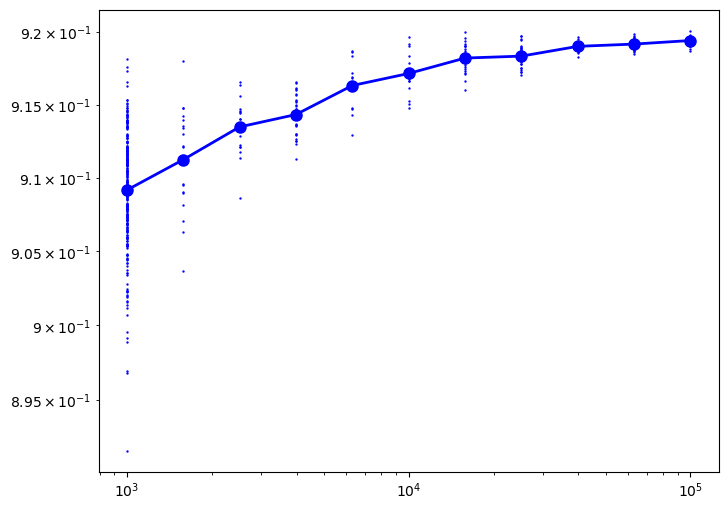

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.loglog(nums_Vs, coefficients_means, 'o-', markersize=8, c='b', linewidth=2)
for num_Vs in nums_Vs:
    x = num_Vs * np.ones(len(coefficients[num_Vs]))
    y = coefficients[num_Vs]
    ax.scatter(x, y, s=0.5, c='b')

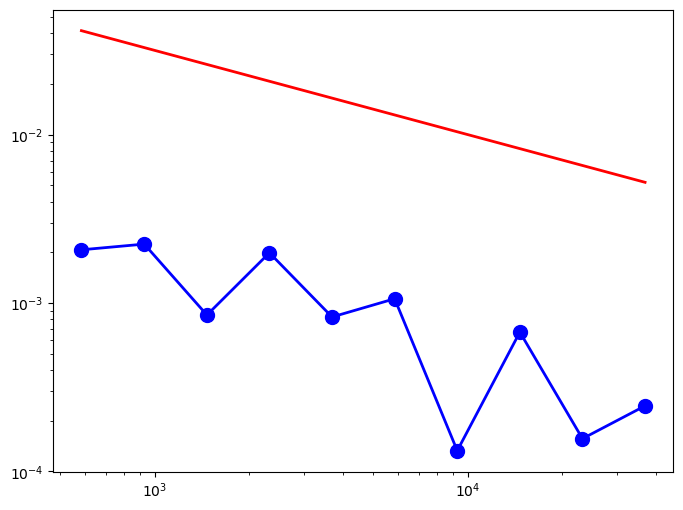

In [89]:
difs = [np.abs(coefficients_means[i] - coefficients_means[i + 1]) for i in range(len(coefficients_means) - 1)]
num_Vs_difs = [np.abs(nums_Vs[i] - nums_Vs[i + 1]) for i in range(len(coefficients_means) - 1)]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.loglog(num_Vs_difs, difs, 'o-', markersize=10, c='b', linewidth=2)
ax.loglog(num_Vs_difs, np.array(num_Vs_difs)**(-0.5), markersize=10, c='r', linewidth=2)